Canny filter is still a powerful edge detector even though it's invented in 1986 [1].
This demo shows you how to use our newly developed package `ImageEdgeDetection` with
Canny filter as an example.

In [1]:
using Images, ImageEdgeDetection, Noise
using ImageEdgeDetection: Percentile
using TestImages

!!! info
    `ImageEdgeDetection.jl` rewrites many functions which previously exists in `Images.jl` and
    will be reexported in `Images` in the future, so you don't need to `using ImageEdgeDetection`
    explicitly after that.

In JuliaImages, any `AbstractArray` can be treated as an image. In this demo, we'll use a generated
image for illustration purpose.

First, we create our test image.

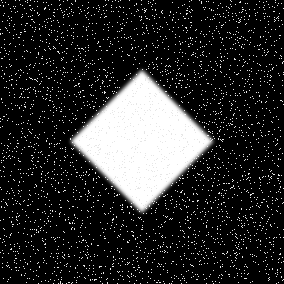

In [2]:
function make_simple_image(sz)
    img_gray = zeros(Gray{Float64}, sz...)
    fill_region = map(x->x÷4:3x÷4, sz)
    img_gray[fill_region...] .= 1
    img_rot = imrotate(img_gray, pi/4)

    # Corrupt the image with blur and noise, it makes our canny edge detection
    # function works a little harder since the canny filter is based on the idea
    # of finding gradients.
    img_gauss = imfilter(img_rot, Kernel.gaussian(2))

    # We use `salt_pepper` filter from `Noise.jl`. Salt-and-pepper noise in general
    # is a noise that modifies a pixel with two different values of noise.
    # Here we only random set pixels to white.
    img_noise = salt_pepper(img_gauss, 0.05, salt_prob = 0, pepper = 0.9)
end
img = make_simple_image((200, 200))

`ImageEdgeDetection` offers a unified API `detect_edges(img, alg)` with
various algorithms. In this demo we'll show how to use the `Canny`
operator [1]. First we'll need to create an algorithm instance of `Canny`.

In [3]:
alg = Canny(spatial_scale=1, high=Percentile(80), low=Percentile(20))

ImageEdgeDetection.Canny{Int64, ImageEdgeDetection.Percentile{Int64}, ImageEdgeDetection.Percentile{Int64}, ImageEdgeDetection.NonmaximaSuppression{ImageEdgeDetection.Percentile{Int64}}}
  spatial_scale: Int64 1
  high: ImageEdgeDetection.Percentile{Int64}
  low: ImageEdgeDetection.Percentile{Int64}
  thinning_algorithm: ImageEdgeDetection.NonmaximaSuppression{ImageEdgeDetection.Percentile{Int64}}


and then apply this instance as parameters to `detect_edges`, with the Julia
[multiple dispatch mechanism](https://docs.julialang.org/en/v1/manual/methods/#Methods),
`detect_edges` knows which algorithm implementation should be called with
the `alg` information.

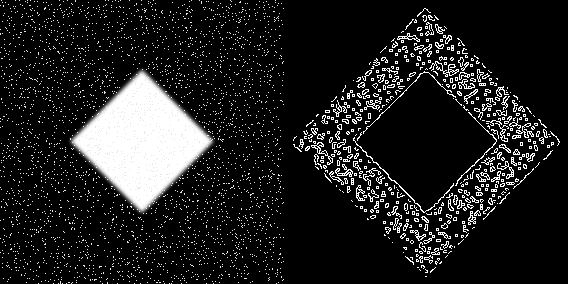

In [4]:
edges = detect_edges(img, alg)
mosaicview(img, edges; nrow=1)

Now let's see how different Canny parameters changes the result, and also see
how it works on real world images:

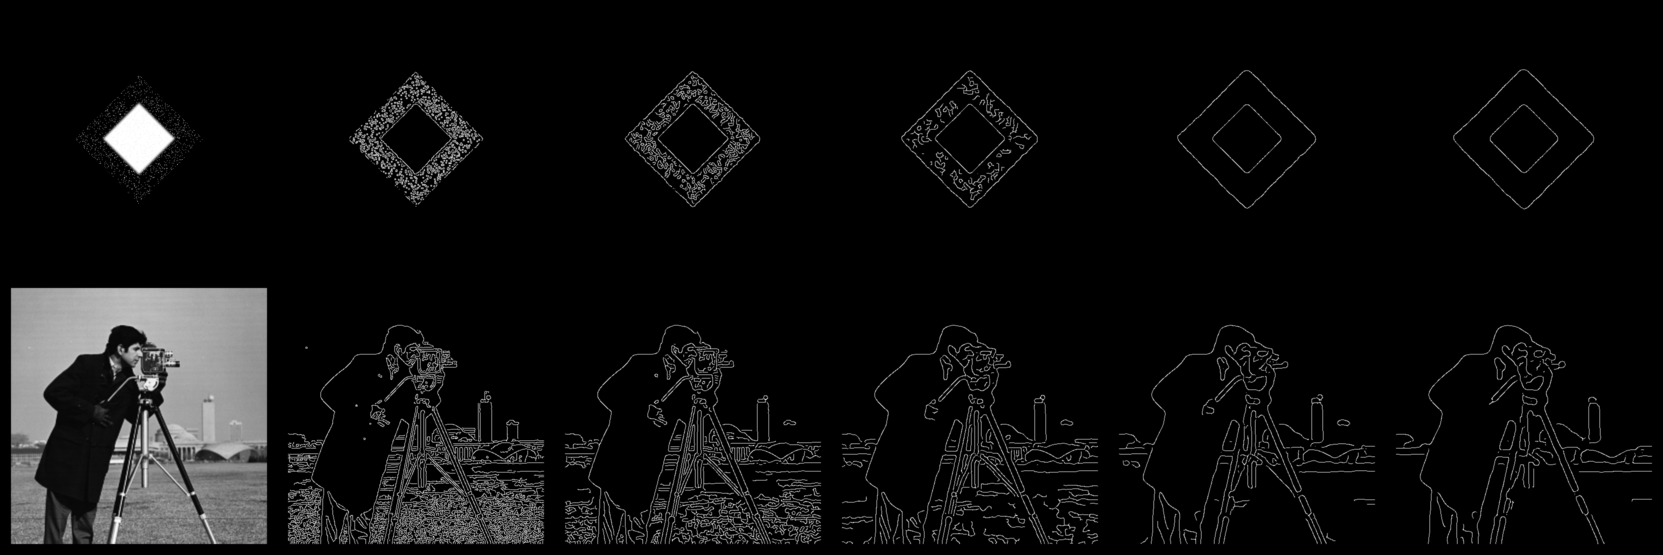

In [5]:
cameraman = testimage("cameraman")
canny(σ) = Canny(spatial_scale=σ, high=Percentile(80), low=Percentile(20))
simple_results = map(σ->detect_edges(img, canny(σ)), 1:5)
cameraman_results = map(σ->detect_edges(cameraman, canny(σ)), 1:5)

mosaicview(
    mosaicview(img, cameraman),
    map(mosaicview, simple_results, cameraman_results)...;
    nrow=1
)

As you can see, higher `spatial_scale` tells the Canny operator to ignore small
details and thus gives a "clean" edge result; whether it is a correct/useful edge
result depends on how you interpret it.

# References

[1] J. Canny, "A Computational Approach to Edge Detection," in _IEEE Transactions on Pattern Analysis and Machine Intelligence_, vol.
PAMI-8, no. 6, pp. 679-698, Nov. 1986, doi: 10.1109/TPAMI.1986.4767851.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*